In [3]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

In [4]:
data = pd.read_csv("digit-recognizer/train.csv")

In [5]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
data =  np.array(data)

In [9]:
m, n = data.shape 
np.random.shuffle(data)

In [65]:
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [66]:
X_train[:, 0].shape # number of pixels

(784,)

In [67]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [68]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        if i % 10 == 0:
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
        
    return W1, b1, W2, b2
            

In [69]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[7 7 0 ... 7 7 8] [8 3 4 ... 2 8 6]
Accuracy:  0.08314634146341464
Iteration:  10
[7 7 9 ... 2 7 8] [8 3 4 ... 2 8 6]
Accuracy:  0.19195121951219513
Iteration:  20
[7 7 9 ... 1 0 0] [8 3 4 ... 2 8 6]
Accuracy:  0.3040731707317073
Iteration:  30
[1 7 9 ... 1 0 0] [8 3 4 ... 2 8 6]
Accuracy:  0.3949268292682927
Iteration:  40
[1 3 9 ... 1 8 0] [8 3 4 ... 2 8 6]
Accuracy:  0.46375609756097563
Iteration:  50
[1 3 9 ... 1 8 0] [8 3 4 ... 2 8 6]
Accuracy:  0.5246341463414634
Iteration:  60
[3 3 9 ... 1 8 0] [8 3 4 ... 2 8 6]
Accuracy:  0.5724390243902439
Iteration:  70
[3 3 9 ... 1 8 6] [8 3 4 ... 2 8 6]
Accuracy:  0.6124878048780488
Iteration:  80
[3 3 9 ... 1 8 6] [8 3 4 ... 2 8 6]
Accuracy:  0.6421463414634146
Iteration:  90
[8 3 9 ... 1 8 6] [8 3 4 ... 2 8 6]
Accuracy:  0.667
Iteration:  100
[8 3 9 ... 1 8 6] [8 3 4 ... 2 8 6]
Accuracy:  0.6882926829268292
Iteration:  110
[8 3 9 ... 1 8 6] [8 3 4 ... 2 8 6]
Accuracy:  0.7052439024390244
Iteration:  120
[8 3 9 ... 1 8 6] [8 

In [70]:
# results

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))

    return W1, b1, W2, b2

Prediction:  [8]
Label:  8


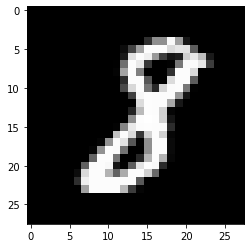

Prediction:  [3]
Label:  3


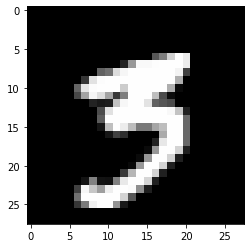

Prediction:  [4]
Label:  4


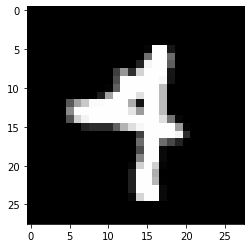

Prediction:  [3]
Label:  3


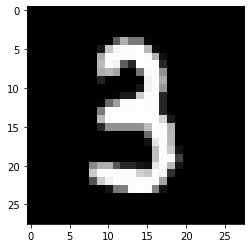

In [71]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [72]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[7 4 4 2 8 0 0 5 3 1 7 4 3 9 6 1 4 7 5 1 5 7 1 8 5 6 0 1 5 5 1 9 7 0 9 7 6
 4 4 9 2 3 1 6 8 1 0 6 2 9 5 4 5 9 0 9 2 6 9 5 5 1 6 3 9 5 0 0 3 8 0 9 2 3
 9 2 0 5 6 0 1 8 9 2 7 4 0 6 7 1 0 8 6 5 9 8 1 4 2 1 9 4 0 3 3 3 4 8 1 7 3
 0 7 1 9 6 6 7 5 9 4 3 0 7 6 7 8 3 4 8 2 5 1 0 7 1 7 0 8 2 7 7 6 7 2 3 7 4
 5 7 1 3 7 4 7 8 3 5 1 0 3 1 6 6 2 3 0 9 9 6 0 6 6 8 3 2 6 2 0 0 4 9 6 9 1
 6 0 6 0 7 9 8 1 7 4 4 7 1 0 5 1 6 4 6 4 9 7 6 2 9 0 4 1 5 1 2 4 9 1 2 9 7
 8 3 7 1 1 1 4 1 6 2 0 1 2 1 3 4 4 8 2 9 0 7 4 3 2 2 1 6 9 9 7 1 6 2 2 8 3
 8 1 9 0 9 0 4 0 0 1 7 9 5 3 0 3 6 1 2 6 4 7 4 1 6 0 2 7 0 1 6 4 8 4 8 0 1
 9 4 1 9 2 4 3 6 5 3 3 1 3 5 2 0 1 6 8 7 0 0 3 1 8 4 9 5 2 7 5 5 5 1 0 3 3
 5 1 6 1 7 0 6 3 9 9 2 8 3 1 2 9 7 6 1 2 1 9 3 9 6 1 9 0 6 3 8 5 9 8 6 9 0
 3 1 8 4 7 2 1 1 7 0 1 6 9 3 6 0 3 8 2 2 6 2 1 7 2 2 0 3 0 4 6 1 0 4 8 5 9
 6 3 5 0 0 0 5 7 4 2 5 1 8 7 9 4 6 9 8 1 9 1 3 6 3 3 6 3 9 5 1 0 7 0 6 2 4
 8 6 4 2 3 9 8 9 0 2 8 7 9 5 9 7 3 5 5 6 6 3 6 3 1 2 7 3 2 1 1 9 8 8 6 4 8
 3 9 3 1 5 5 9 6 8 7 1 8 

0.844